In [1]:
import pandas as pd 
from sklearn.cluster import KMeans,DBSCAN
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_set = pd.read_pickle("headline_ex2.pkl")

In [3]:
data_set = data_set.drop(columns=['country'])

In [4]:
data_set = data_set[data_set['city'].notnull()]

In [5]:
data_set

,headline,city,latitude,longitude,countrycode
0,Zika Outbreak Hits Miami,Miami,25.77427,-80.19366,US
1,Could Zika Reach New York City?,New York City,40.71427,-74.00597,US
2,First Case of Zika in Miami Beach,Miami Beach,25.79065,-80.13005,US
3,"Mystery Virus Spreads in Recife, Brazil",Recife,-8.05389,-34.88111,BR
4,Dallas man comes down with case of Zika,Dallas,32.78306,-96.80667,US
...,...,...,...,...,...
645,Rumors about Rabies spreading in Jerusalem hav...,Jerusalem,31.76904,35.21633,IL
646,More Zika patients reported in Indang,Indang,14.19528,120.87694,PH
647,Suva authorities confirmed the spread of Rotav...,Suva,-18.14161,178.44149,FJ
648,More Zika patients reported in Bella Vista,Bella Vista,-27.03424,-65.30196,AR


In [6]:
k_mean_position_cluster = KMeans(n_clusters = 4).fit(data_set[['latitude','longitude']])

[[ 34.996053   -90.46540116]
 [  5.42372627 119.0592551 ]
 [ -9.26870014 -61.58370784]
 [ 33.62267536  13.46782864]]


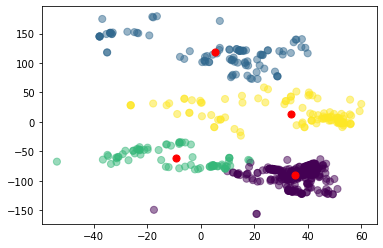

In [7]:
centroids = k_mean_position_cluster.cluster_centers_
print(centroids)
plt.scatter(data_set['latitude'],data_set['longitude'],c = k_mean_position_cluster.labels_.astype(float),s = 50 , alpha = 0.5)
plt.scatter(centroids[:,0],centroids[:,1],c = 'red', s = 50)
plt.show()

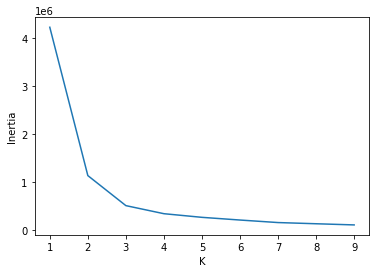

In [8]:
k_value = range(1,10) 
inertia_val = [KMeans(k).fit(data_set[['latitude','longitude']]).inertia_ for k in k_value]

plt.plot(k_value, inertia_val )
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

In [33]:
DBSCAN_POS_Cluster = DBSCAN(eps= 12, min_samples = 10)
DBSCAN_POS_Cluster.fit(data_set[['latitude','longitude']])
DBSCAN_label = DBSCAN_POS_Cluster.labels_
print(DBSCAN_label)


[ 0  0  0  1  0  1  0  2  0  1  0  0  1  0  3  3  0  0  0  0  2  0  0  3
  0  2  2  0  3  3  1  4  3  0  1  0  5  3  1  0  0  0  1  0  0  0  5 -1
  0  0  0  0  0  0  0  3  0  0  0 -1  1  0  3  0  3  5  3  3  3  0  3  0
  1  0  2  3  0  0  2  0  0  3  0  1 -1  5  0  1  5  0  3  0  3  3  0  3
  0  3 -1  1  3  0 -1  0  0  3  2 -1  0  0  0  2  3  0  0  0  3  3  0  0
  3  3  0 -1  3  3  0  4 -1  3  0  0  0  0 -1  0  0 -1  1  0  0  2  0  0
  0  0  2  0  0  0  0  1  0  0  0  0  1  0  2  1  3  0  3  0  0 -1  0  0
  2  0  0  1  2 -1  0  0  0  0  1  0 -1  0  0  0  0  0  0  0  3  0  1  0
  0  0  2  3  0  2  0  0  0  0  0  0  0  0  0  0  0  2  3  0  0 -1  0  2
  0  0  0 -1 -1  2  0  0  0  2  0  0  2  0 -1  0  0  0  2  4  2  2  0  2
  5  5  0  0  0  0  2  3  0  0  0  0  0  3 -1  0 -1 -1  0  3  2  0  0  2
  0  3  2  3  3  0  1  3  3  3  0 -1  0  0  0  0  1  2  3  0  2  0  0  0
  2  2  0  0  0  0  1  0  2  2  0  0  5 -1  0  2  4  0  2 -1  0  3  0 -1
  0  0  0  0  5  1  0 -1  3  2  0  0  2  0 -1  3  2

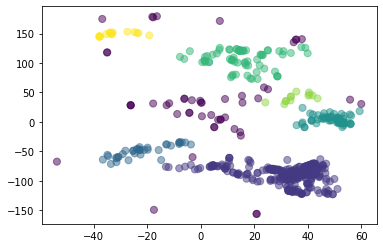

In [34]:
plt.scatter(data_set['latitude'],data_set['longitude'],c = DBSCAN_label.astype(float),s = 50 , alpha = 0.5)

In [35]:
print(len(DBSCAN_label))

606


In [36]:
print(set(DBSCAN_label))

{0, 1, 2, 3, 4, 5, -1}
